Model training


importing data and required pages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


identifying the independent feature and dependent feature

In [4]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [5]:
x.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print('categories of the gender variab;e:',end=" ")
print(df['gender'].unique())
print('categories of the race ethiniciy variab;e:',end=" ")
print(df['race_ethnicity'].unique())
print('categories of the parental level education variab;e:',end=" ")
print(df['parental_level_of_education'].unique())
print('categories of the lunch variab;e:',end=" ")
print(df['lunch'].unique())
print('categories of the test preparation score variab;e:',end=" ")
print(df['test_preparation_course'].unique()) 

categories of the gender variab;e: ['female' 'male']
categories of the race ethiniciy variab;e: ['group B' 'group C' 'group A' 'group D' 'group E']
categories of the parental level education variab;e: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories of the lunch variab;e: ['standard' 'free/reduced']
categories of the test preparation score variab;e: ['none' 'completed']


In [7]:
## create a column transformer
numerical_feature=x.select_dtypes(exclude='object').columns
categorical_feature=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocesso=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,categorical_feature),
        ('StandardScalar',numeric_transformer,numerical_feature)
    ]
)

In [8]:
x=preprocesso.fit_transform(x)


In [9]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

create an evaluate model to give the test result of the model

In [11]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mabs=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_scor=r2_score(true,predicted)
    return mse,mabs,rmse,r2_scor

In [12]:
models={
    'LinearRegression':LinearRegression(),
    'svr':SVR(),
    'RandomForestRegressor':RandomForestRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    'decision tree':DecisionTreeRegressor(),
    'xgregressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}
models_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    ##evaluate the test model result

    msetrain,model_mabs,model_rmse,model_r2score=evaluate_model(y_train,y_train_pred)
    msetest,model_test_mabs,model_test_rmse,model_test_r2score=evaluate_model(y_test,y_test_pred)

    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print("the test performance of training data")
    print("mean absolute error :{:.4f}".format(model_mabs))
    print("root mean squared error:{:.4f}".format(model_rmse))
    print("r2_score:{:.4f}".format(model_r2score))
    print("------------------------------------------------------\n")
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print("the test performance of test data")
    
    print("mean absolute error :{:.4f}".format(model_test_mabs))
    print("root mean squared error:{:.4f}".format(model_test_rmse))
    print("r2_score:{:.4f}".format(model_test_r2score))
    print("------------------------------------------------------\n")
    r2_list.append(model_test_r2score)
    print("="*35)
    print('\n')

LinearRegression
the test performance of training data
mean absolute error :4.2667
root mean squared error:5.3231
r2_score:0.8743
------------------------------------------------------

LinearRegression
the test performance of test data
mean absolute error :4.2148
root mean squared error:5.3940
r2_score:0.8804
------------------------------------------------------



svr
the test performance of training data
mean absolute error :4.8692
root mean squared error:6.5770
r2_score:0.8081
------------------------------------------------------

svr
the test performance of test data
mean absolute error :5.4015
root mean squared error:8.1266
r2_score:0.7286
------------------------------------------------------



RandomForestRegressor
the test performance of training data
mean absolute error :1.8236
root mean squared error:2.2946
r2_score:0.9766
------------------------------------------------------

RandomForestRegressor
the test performance of test data
mean absolute error :4.6867
root mean s

In [13]:
pd.DataFrame(list(zip(models_list,r2_list)),columns=['model name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model name,r2_score
4,RandomForestRegressor,0.880593
0,LinearRegression,0.880433
8,ridge,0.851632
2,svr,0.850240
9,ridge,0.845455
7,KNeighborsRegressor,0.827797
5,RandomForestRegressor,0.825320
3,svr,0.783813
6,KNeighborsRegressor,0.736951
1,LinearRegression,0.728600


In [14]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print('accuracy of the model is %2.f'%score)

accuracy of the model is 88


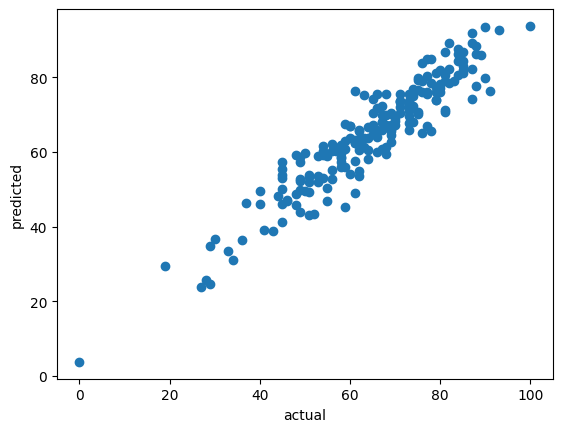

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<Axes: xlabel='math_score'>

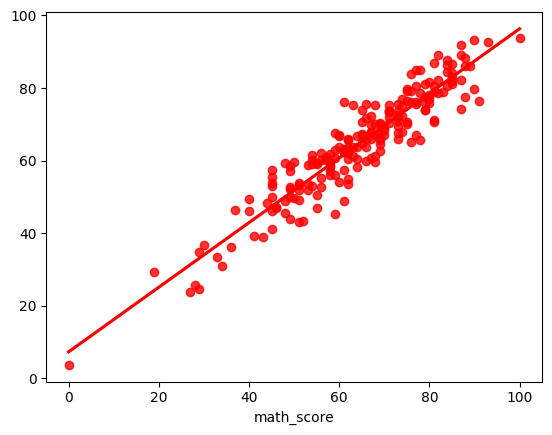

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [18]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicted_value0':y_pred,'difference':y_test-y_pred})
pred_df

,Actual value,predicted_value0,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
